In [1]:
import random, warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from syn_exp import *
from viz import *

y0_pdf = 'sinusoid'
y1_pdf = 'low_base_rate_sinusoid'
pi_pdf = 'linear'

## Parameter Estimation Experiment

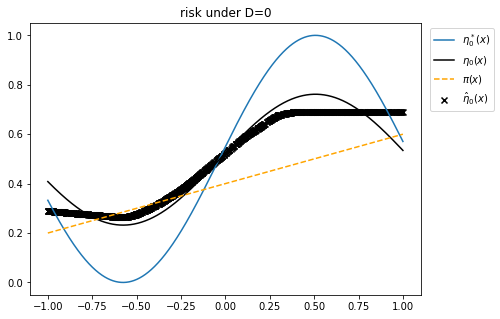

In [3]:
# Example code invoking experiemnt setup functions
expdf, error_params = generate_syn_data(
    NS=5000,
    y0_pdf=y0_pdf,
    y1_pdf=y1_pdf,
    pi_pdf='linear',
    error_min=0.05,
    error_max=0.25
)

do=0
alpha_hat, beta_hat, debug_info = ccpe(expdf, do=do)
viz_ccpe_estimates(expdf, debug_info, error_params, do, y0_pdf, y1_pdf, pi_pdf) 

## Estimator comparison experiment 
- Plot a comparison of 4 estimators: observational, conditional prob., PO oracle, PO* oracle

In [7]:
NS = 5000
N_RUNS = 5

results = {
    'model': [],
    'AU-ROC': []
}

for RUN in range(N_RUNS):

    expdf, error_params = generate_syn_data(
        NS,
        y0_pdf='sinusoid',
        y1_pdf='low_base_rate_sinusoid',
        pi_pdf='linear',
        error_min=0.05,
        error_max=0.25
    )

    run_results = run_experiment(expdf, do=0)
    results['model'].extend(run_results['model'])
    results['AU-ROC'].extend(run_results['AU-ROC'])
    
resultdf = pd.DataFrame(results)

##  Parameter estimation experiment 
- Plot parameter estimation error as a function of sample size

In [4]:
NS = 5000
N_RUNS = 15

results = []
SAMPLE_SIZES = [2000, 4000, 6000, 8000, 10000, 20000]

for NS in SAMPLE_SIZES:
    for RUN in range(N_RUNS):
        expdf, error_params = generate_syn_data(
            NS,
            y0_pdf=y0_pdf,
            y1_pdf=y1_pdf,
            pi_pdf=pi_pdf,
            error_min=0.05,
            error_max=0.25
        )

        exp_result = run_param_estimation_exp(expdf, error_params)    
        results.append(exp_result)


<AxesSubplot:xlabel='NS'>

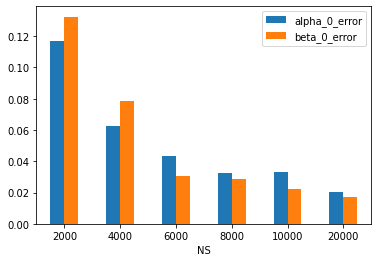

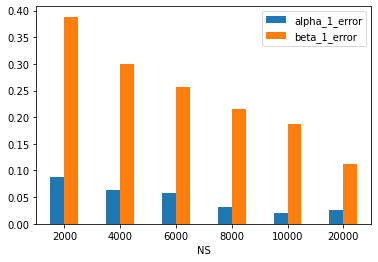

In [8]:
# Plot sanity check -- assert error converges as sample size increases

estimation_df = pd.DataFrame(results)
meandf = estimation_df.groupby('NS').mean()
meandf[['alpha_0_error', 'beta_0_error']].plot.bar(rot=0)
meandf[['alpha_1_error', 'beta_1_error']].plot.bar(rot=0)

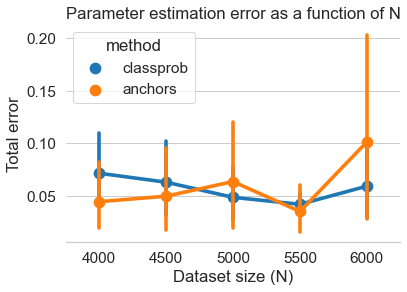

In [10]:
runslog = pd.DataFrame(runs)
data = pd.melt(runslog, id_vars=['N', 'alpha', 'beta', 'alpha_hat', 'beta_hat', 'total_error', 'method'],
        value_vars=['alpha_error', 'beta_error'], value_name='error')

data = data[data['variable'] == 'alpha_error']
sns.pointplot(data=data, x='N', y='error', hue='method')
plt.ylabel('Total error')
plt.xlabel('Dataset size (N)')
plt.title('Parameter estimation error as a function of N')
sns.despine(left=True)

